# Project: Collecting and Storing Data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

---
### Dataset Upload
Importing and studying datasets created from the SQL database on Zuber rideshare info:

In [2]:
co_rides = pd.read_csv('project_sql_result_01.csv') # Count of rides by company
avg_rides = pd.read_csv('project_sql_result_04.csv') # Avg num of rides ending in each neighborhood
air_rides = pd.read_csv('project_sql_result_07.csv') # Rides starting at Loop and ending at O'Hare

In [3]:
co_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
avg_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
air_rides.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [6]:
# converting start to to datetime type
air_rides['start_ts'] = pd.to_datetime(air_rides['start_ts'])
air_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


----
### Identify the top 10 neighborhoods in terms of drop-offs

In [7]:
top10_hoods = avg_rides.sort_values('average_trips', ascending=False).head(10)
top10_hoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


------
## Graphs:
#### Taxi Companies to Number of Rides

In [8]:
co_rides.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


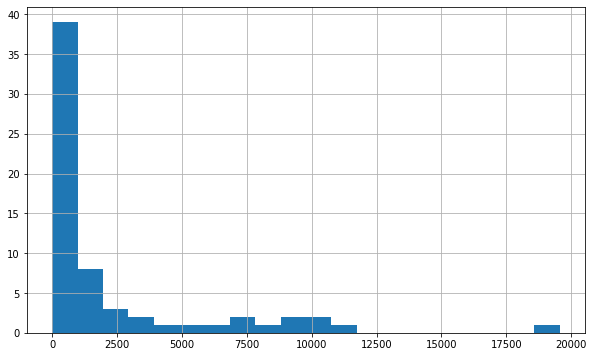

In [9]:
co_rides['trips_amount'].hist(bins=20, figsize=(10,6))

Text(0, 0.5, 'Number of Rides')

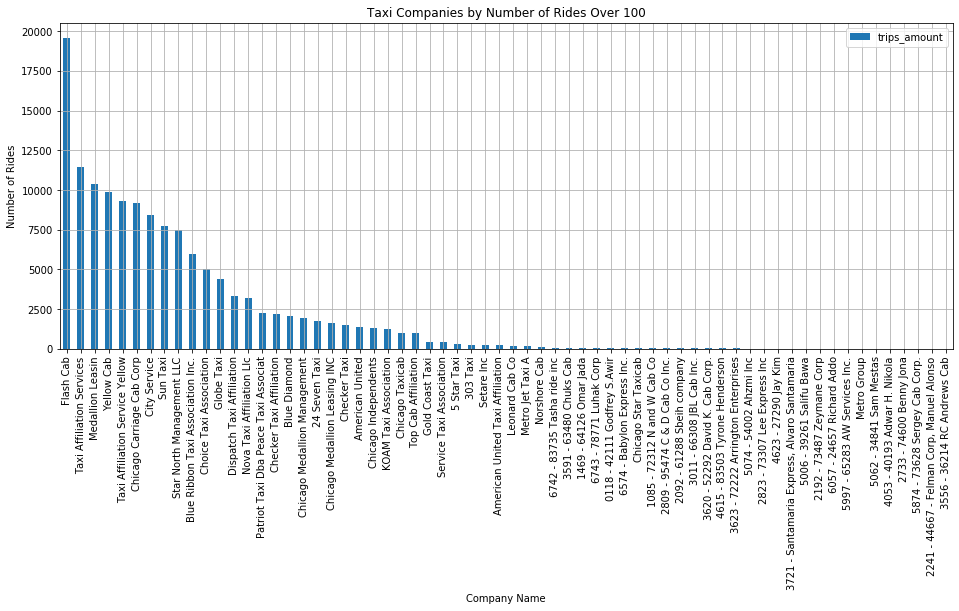

In [10]:
co_rides.plot(kind='bar', x='company_name', y='trips_amount', figsize=(16,6), grid=True)
plt.xticks(rotation=90)
plt.title('Taxi Companies by Number of Rides Over 100')
plt.xlabel('Company Name')
plt.ylabel('Number of Rides')

#### Same graph but zoomed in on the top 25 Companies

Text(0, 0.5, 'Number of Rides')

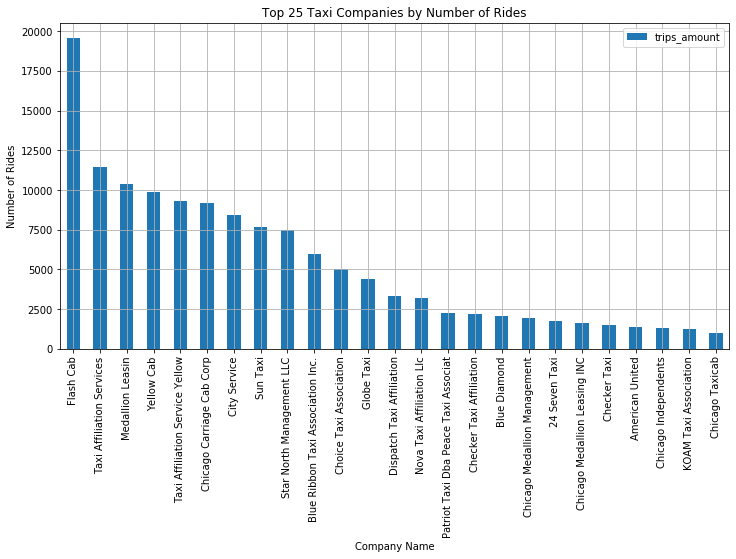

In [11]:
co_rides.sort_values('trips_amount', ascending=False).head(25).plot(kind='bar', x='company_name', y='trips_amount', figsize=(12,6), grid=True)
plt.xticks(rotation=90)
plt.title('Top 25 Taxi Companies by Number of Rides')
plt.xlabel('Company Name')
plt.ylabel('Number of Rides')

##### Results:
- Based on the above graphs, we can conclude that a minority portion of all the taxi companies make up the majority of the rides
- Only the top 25 companies have over 100 rides each per month
- Only the top 3 companies have over 10,000 rides each per month
- Flash Cab is the top company in terms of rides given as it has almost double the number of rides of each of the next two best companies.

---
### Top 10 Neighborhoods by Dropoff

In [12]:
top10_hoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Text(0, 0.5, 'Average Number of Trips')

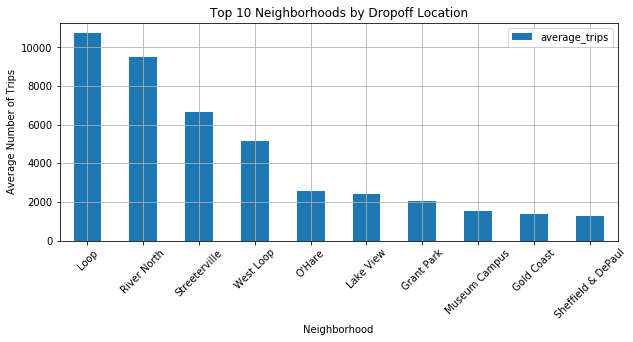

In [13]:
top10_hoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', figsize=(10,4), grid=True)
plt.xticks(rotation=45)
plt.title('Top 10 Neighborhoods by Dropoff Location')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Trips')

##### Results: 
- Based on the graph above, we can that the top 4 neighborhoods stand out above the rest
- The top 4 also have large differences in average number of trips. Range (West Loop to Loop) ~5500 rides difference
- The rest have fewer trips on average, but are not too different from each other. Range (Sheffield & Depaul to O'Hare) ~1250 rides difference


---
## Hypothesis Testing:
#### Null: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
#### Alternative: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

In [14]:
air_rides.head()
# Data from SQL showing Saturday rides start time, weather, and duration on teh Loop to O'Hare route

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
good_w = air_rides[air_rides['weather_conditions'] == 'Good']
bad_w = air_rides[air_rides['weather_conditions'] == 'Bad']
air_rides['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [19]:
good_w['duration_seconds'].mean()

1999.6756756756756

In [20]:
bad_w['duration_seconds'].mean()

2427.2055555555557

- Null: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
- Alternative: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

In [18]:
s1 = good_w['duration_seconds']
s2 = bad_w['duration_seconds']
alpha = 0.01

res = st.ttest_ind(s1, s2)
print('p-value:', res.pvalue)

if res.pvalue < alpha:
    print('We Reject the Null Hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 6.517970327099473e-12
We Reject the Null Hypothesis


### Hypothesis Results:
- The test resulted in an extremely small p-value, meaning it is below the alpha of 0.01 causing us to Reject the Null Hypothesis. This means that the average duration of rides does not change a significant amount longer or shorter on rainy Saturdays compared to Saturdays without rain.
- It is also important to note the difference in the sample sizes. There are significantly more good weather datpoints (880) than bad weather ones (180). This may be a normal distribution in weather patterns for the area, but if not and there should be more 'bad' data, then our results could change as the new data could potentially skew the average.